In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("anemia (1).csv")

In [4]:
df.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1240 entries, 1234 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1240 non-null   int64  
 1   Hemoglobin  1240 non-null   float64
 2   MCH         1240 non-null   float64
 3   MCHC        1240 non-null   float64
 4   MCV         1240 non-null   float64
 5   Result      1240 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 67.8 KB


In [6]:
df.isnull().sum()

Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64

In [9]:
df.shape

(1421, 6)

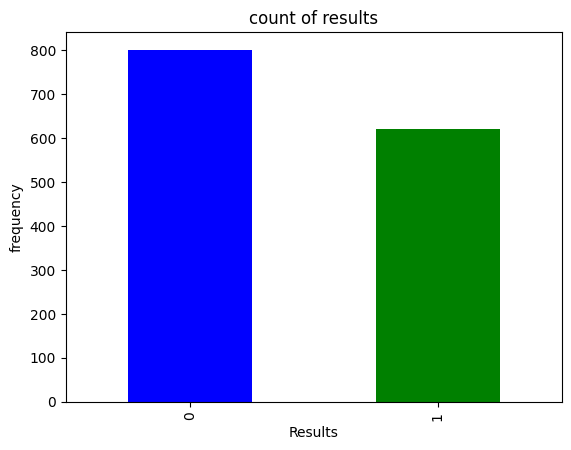

In [10]:
results=df["Result"].value_counts()
results.plot(kind='bar',color=['blue','green'])
plt.xlabel("Results")
plt.ylabel("frequency")
plt.title("count of results")
plt.show()

In [13]:
from sklearn.utils import resample
majc=df[df["Result"]==0]
minc=df[df["Result"]==1]
major_downsample = resample(majc , replace=False , n_samples=len(minc),random_state=42)
df=pd.concat([major_downsample,minc])
print(df["Result"].value_counts())

Result
0    620
1    620
Name: count, dtype: int64


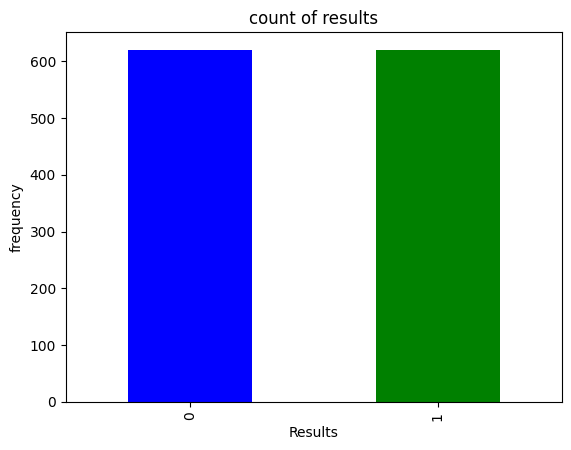

In [14]:
results=df["Result"].value_counts()
results.plot(kind='bar',color=['blue','green'])
plt.xlabel("Results")
plt.ylabel("frequency")
plt.title("count of results")
plt.show()

In [16]:
df.describe()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
count,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000
mean,0.540323,13.218145,22.903952,30.277984,85.620968,0.500000
std,0.498573,1.976190,3.993624,1.394515,9.673794,0.500202
min,0.000000,6.600000,16.000000,27.800000,69.400000,0.000000
25%,0.000000,11.500000,19.400000,29.100000,77.300000,0.000000
50%,1.000000,13.000000,22.700000,30.400000,85.300000,0.500000
75%,1.000000,14.900000,26.200000,31.500000,94.225000,1.000000
max,1.000000,16.900000,30.000000,32.500000,101.600000,1.000000


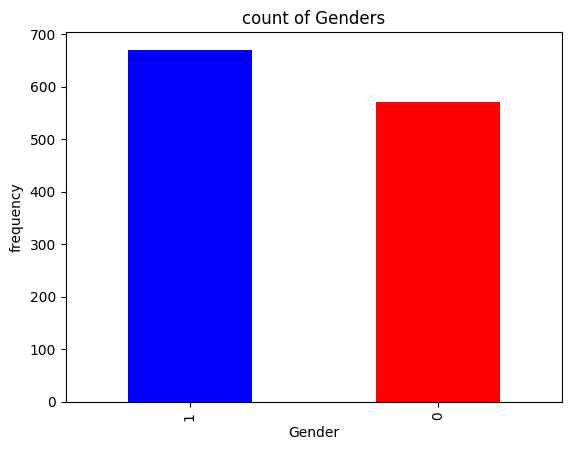

In [19]:
output=df["Gender"].value_counts()
output.plot(kind='bar',color=['blue','red'])
plt.xlabel("Gender")
plt.ylabel("frequency")
plt.title("count of Genders")
plt.show()

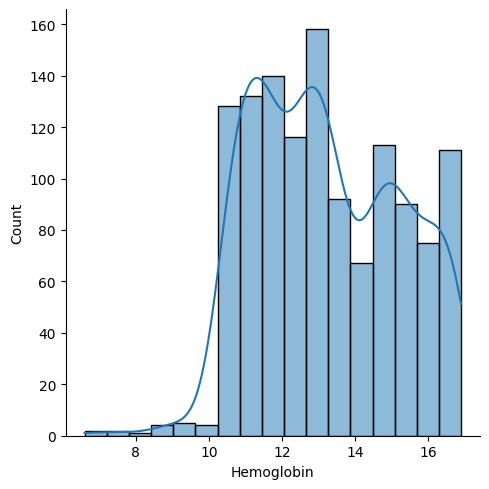

In [20]:
sns.displot(df["Hemoglobin"],kde=True)

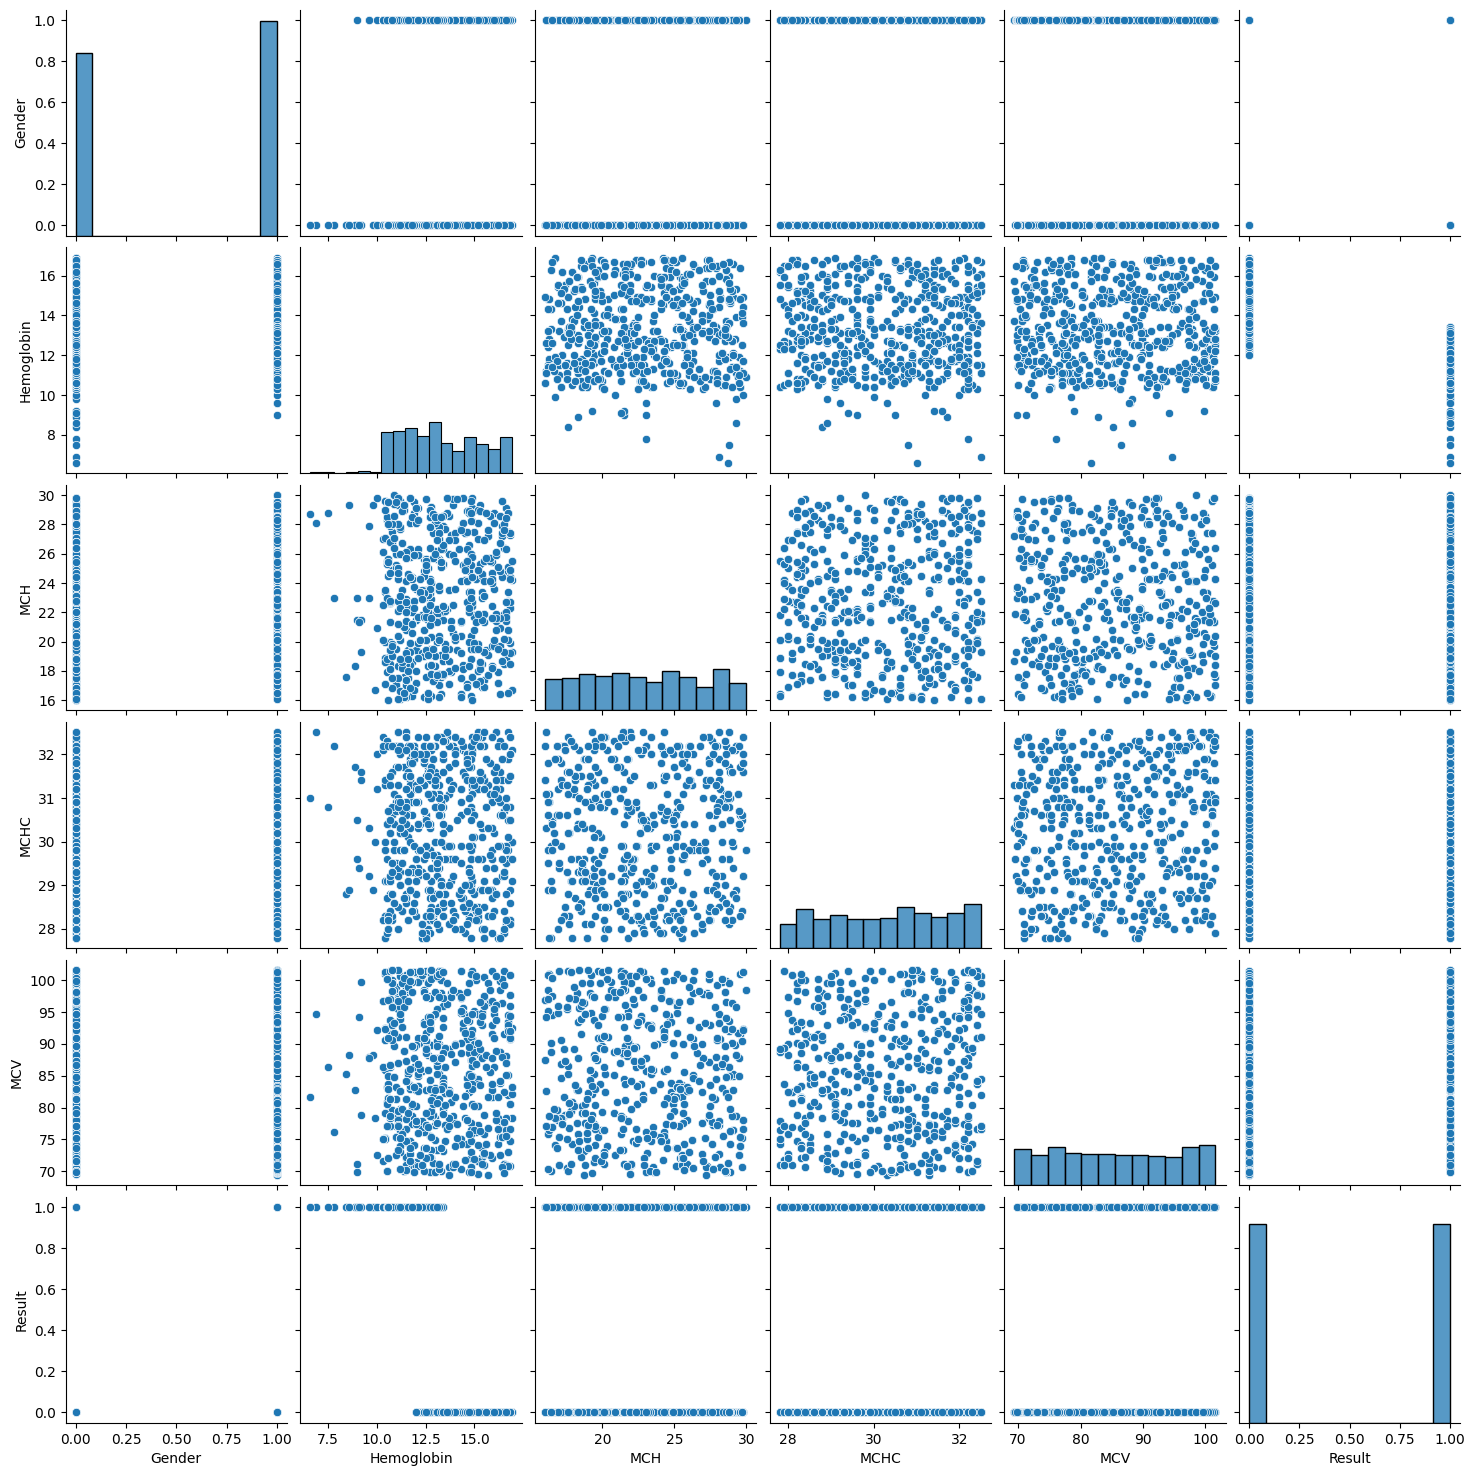

In [21]:
sns.pairplot(df)

In [22]:
X=df.drop("Result",axis=1)
X

,Gender,Hemoglobin,MCH,MCHC,MCV
1234,1,16.6,18.8,28.1,70.9
1188,0,15.3,18.3,30.4,93.4
106,0,14.8,20.4,28.5,91.1
954,0,14.6,16.9,31.9,78.1
112,0,15.9,28.7,31.0,81.6
...,...,...,...,...,...
1415,1,13.2,20.1,28.8,91.2
1416,0,10.6,25.4,28.2,82.9
1417,1,12.1,28.3,30.4,86.9
1418,1,13.1,17.7,28.1,80.7


In [23]:
y=df["Result"]
y

1234    0
1188    0
106     0
954     0
112     0
       ..
1415    1
1416    1
1417    1
1418    1
1420    1
Name: Result, Length: 1240, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , classification_report

lr= LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

acc_lr = accuracy_score(y_test,y_pred)
c_lr=classification_report(y_test,y_pred)

print("accuracy score: ", acc_lr)
print(c_lr)

accuracy score:  0.9919354838709677
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       113
           1       0.99      1.00      0.99       135

    accuracy                           0.99       248
   macro avg       0.99      0.99      0.99       248
weighted avg       0.99      0.99      0.99       248



In [31]:
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

acc_dt = accuracy_score(y_test,y_pred)
c_dt=classification_report(y_test,y_pred)

print("accuracy score: ", acc_dt)
print(c_dt)

accuracy score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00       135

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248



In [32]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

acc_rf = accuracy_score(y_test,y_pred)
c_rf=classification_report(y_test,y_pred)

print("accuracy score: ", acc_rf)
print(c_rf)

accuracy score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00       135

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248



In [33]:
from sklearn.naive_bayes import GaussianNB

nb= GaussianNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)

acc_nb = accuracy_score(y_test,y_pred)
c_nb=classification_report(y_test,y_pred)

print("accuracy score: ", acc_nb)
print(c_nb)

accuracy score:  0.9798387096774194
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       113
           1       0.97      0.99      0.98       135

    accuracy                           0.98       248
   macro avg       0.98      0.98      0.98       248
weighted avg       0.98      0.98      0.98       248



In [35]:
from sklearn.svm import SVC

sv= SVC()
sv.fit(X_train,y_train)
y_pred = sv.predict(X_test)

acc_sv = accuracy_score(y_test,y_pred)
c_sv=classification_report(y_test,y_pred)

print("accuracy score: ", acc_sv)
print(c_sv)

accuracy score:  0.9395161290322581
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       113
           1       0.91      0.99      0.95       135

    accuracy                           0.94       248
   macro avg       0.95      0.93      0.94       248
weighted avg       0.94      0.94      0.94       248



In [36]:
from sklearn.ensemble import GradientBoostingClassifier

gb= GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)

acc_gb = accuracy_score(y_test,y_pred)
c_gb=classification_report(y_test,y_pred)

print("accuracy score: ", acc_gb)
print(c_gb)

accuracy score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00       135

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248



In [37]:
pred = gb.predict([[0,11.6,22.3,30.9,74.5]])

C:\Users\Muskan Kirti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [39]:
pred[0]
if pred[0]==0:
    print("person does'nt has anemia")
else:
    print("person has anemia")

person has anemia
